## イントロ

本日の講座は機械学習20本ノックです。  
目次は次のようになります。データの欠損値の扱い方やデータエンジニアリングの観点で基礎的な部分を扱います。  
最後に3つのモデルで分類と回帰を行います。


- データ前処理(pandas)
  - データ読み込み 1
  - 欠損値の確認 2
  - 欠損値処理
      - 欠損値除去 3
      - 欠損値埋め 4
      - 乱数補完 5, 6
      - 前の値で補完 7
  - データエンジニアリング
      - ダミー変数化 8
      - Min-Max scaling 9
      - 標準化 10
      - 主成分分析PCA 11, 12, 13
- モデル構築(3本)
  - 分類
      - Logistic回帰 14, 15, 16
      - k近傍法 17
  - 回帰
      - 重回帰分析 18, 19, 20
  
では早速進めていきましょう。

## ■事前準備
データをインストールしておきましょう。  
また以下のモジュールをインストールしておきましょう。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

## 1. データの読み込み
`data.csv`を`df`として読み込み、先頭の5件を表示しなさい。

In [197]:
df = pd.read_csv('data.csv')

In [173]:
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


## 2. 欠損値の確認
`df`のカラムごとの欠損値の数を確認しなさい

### 解答

In [174]:
# ざっと確認する方法
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Name    891 non-null object
Age     714 non-null float64
Sex     879 non-null object
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


In [176]:
# 具体的な数
df.isnull().sum()

Name      0
Age     177
Sex      12
dtype: int64

## 3. 欠損値除去
欠損値のある行を削除しなさい。

In [175]:
df.dropna()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",39.0,female
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
889,"Behr, Mr. Karl Howell",26.0,male


行の数が891→705になっていますね。

## 4. 欠損値補完
`age`カラムの統計値を確認したあと、欠損値を以下の3つのパターンで補完しなさい。

- 0
- 平均値
- 中央値


In [182]:
df[['Age']].tail()

,Age
886,27.0
887,19.0
888,NaN
889,26.0
890,32.0


### 解答

In [185]:
df[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [186]:
# 0で
df_zero = df[['Age']].fillna(0)
df_zero.tail(3)

,Age
888,0.0
889,26.0
890,32.0


In [190]:
# 平均値で
df_mean = df[['Age']].fillna(int(df['Age'].mean())) # 年齢は整数なのでint型への変換を忘れないように
df_mean.tail(3)

,Age
888,29.0
889,26.0
890,32.0


In [189]:
# 中央値で
df_median = df[['Age']].fillna(df['Age'].median())
df_median.tail(3)

,Age
888,28.0
889,26.0
890,32.0


## 5. 乱数補完(part1 乱数生成)
`age`カラムの値を元に乱数(平均と分散は`age`カラムから算出)を作成しなさい。  
ヒント：
- np.random.randint()
- 範囲は`age`カラムの平均から標準偏差を足し引きする

In [198]:
ave = df['Age'].mean()
std = df['Age'].std()
num = df['Age'].isnull().sum()

In [199]:
rand = np.random.randint(ave - std, ave + std, size=num)

## 6. 乱数補完(part2 前後の分布の確認)
補完前の分布を確認後、作成した乱数で欠損値を補完し、分布に差がないか確認しなさい。  

### 解答

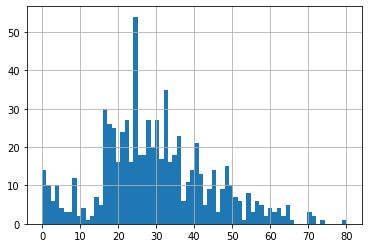

In [201]:
# 補完前
df['Age'].dropna().astype(int).hist(bins=70)

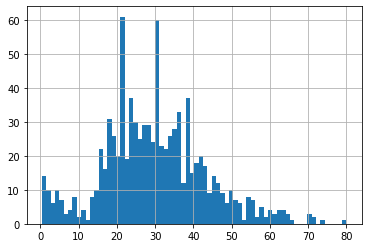

In [205]:
# 補完
df['Age'][df['Age'].isnull()] = rand
# 補完後
df['Age'].hist(bins=70)

## 7. 前の値で補完
カラム`sex`の欠損値を一つ前の値で補完しなさい。(`NaN`→`female`)

In [214]:
df[['Sex']].head()

,Sex
0,male
1,female
2,female
3,NaN
4,male


### 解答

In [216]:
df[['Sex']].fillna(method="ffill").head()

,Sex
0,male
1,female
2,female
3,female
4,male


## 8. ダミー変数へ変換
カテゴリ変数である性別(`sex`)カラムのデータをダミー表現(`male`→`0`, `female`→`1`)に変形させなさい。

In [219]:
df[['Sex']].head()

,Sex
0,male
1,female
2,female
3,NaN
4,male


### 解答

In [222]:
pd.get_dummies(df['Sex']).drop('male', axis=1).head()

,female
0,0
1,1
2,1
3,0
4,0


## 9. Min-Max Scaling
`Age`カラムのデータを最小値0、最大値1に正規化しなさい。  
ただし、元のデータ範囲は`Age`カラムの最大値最小値とする。  
ヒント：`sklearn.preprocessing`の中のモジュールを使う

In [224]:
df[['Age']].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


### 解答

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
mmscaler = MinMaxScaler(feature_range=(0, 1), copy=True)

In [227]:
lim_min, lim_max = df['Age'].min(), df['Age'].max()
mmscaler.fit(np.array([lim_min, lim_max]).reshape(-1, 1))

MinMaxScaler()

In [228]:
mmscaler.transform(df[['Age']])

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [0.30887158],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [0.50992712],
       [0.3842674 ],
       [0.48479517],
       [0.43453129],
       [0.42196532],
       [0.18321186],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [0.19577783],
       [0.23347575],
       [0.40939935],
       [0.18321186],
       [0.49736115],
       [0.48479517],
       [0.44709726],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [0.45966323],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [0.48479517],
       [0.03242021],
       [0.23347575],
       [0.2963056 ],
       [0.19577783],
       [0.384

## 10. 標準化
`Age`カラムのデータを平均0、分散1に標準化しなさい。

### 解答

In [229]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit_transform(df[['Age']])

array([[-0.58927533],
       [ 0.59673448],
       [-0.29277288],
       [ 0.37435764],
       [ 0.37435764],
       [-0.36689849],
       [ 1.78274429],
       [-2.07178759],
       [-0.21864726],
       [-1.18228023],
       [-1.92353636],
       [ 2.07924674],
       [-0.73752656],
       [ 0.67086009],
       [-1.18228023],
       [ 1.8568699 ],
       [-2.07178759],
       [ 0.81911132],
       [ 0.07785519],
       [ 0.67086009],
       [ 0.37435764],
       [ 0.30023203],
       [-1.10815462],
       [-0.14452165],
       [-1.62703391],
       [ 0.59673448],
       [-1.03402901],
       [-0.81165217],
       [ 0.22610641],
       [-1.10815462],
       [ 0.7449857 ],
       [ 0.67086009],
       [ 0.44848325],
       [ 2.67225164],
       [-0.14452165],
       [ 0.89323693],
       [ 0.52260887],
       [-0.66340094],
       [-0.88577778],
       [-1.18228023],
       [ 0.7449857 ],
       [-0.21864726],
       [ 0.67086009],
       [-1.99766198],
       [-0.81165217],
       [-0

## 11. 主成分分析 (part1 標準化)
`wine.csv`を読み込み(`df_wine`とする)、`class`ラベルを除いたデータを平均0，分散1で標準化(`dfs`とする)しなさい。

In [232]:
df_wine = pd.read_csv('wine.csv')

### 解答

In [231]:
df_wine.to_csv('wine.csv', index=False)

In [234]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [235]:
df_wine.head(2)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [236]:
_dfs = ss.fit_transform(df_wine.iloc[:, 1:]) # 標準化
dfs = pd.DataFrame(_dfs, columns=df_wine.columns[1:]) # クラスラベル以外のカラムをそのまま転用

In [237]:
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 12. 主成分分析(part2 変換)
先ほど標準化したデータを用いて`sklearn.decomposition`から`PCA`モデルを読み込み  
`.transform()`関数を用いてデータを変換しなさい(ただし`feature`という変数名にする)。  

### 解答

In [126]:
from sklearn.decomposition import PCA #主成分分析器

In [127]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs) # 学習
# データを主成分空間に写像
feature = pca.transform(dfs)

In [273]:
# 主成分得点
feature = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]) # データフレームへ変換 以下のようにカラム名を設定
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


## 13. 主成分分析(part3 プロット)
先ほどの`feature`から第一主成分と第二主成分をプロットしなさい。

### 解答

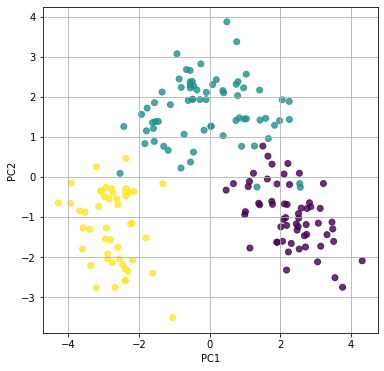

In [129]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 解答

## 14. ロジスティック回帰(part1 データ分割)
先ほどのデータを訓練データとテストデータに分割(8:2)しなさい。  
ただし入力は`feature`第2列目までとし、出力は`df_wine`先頭列とする。  
またデータの分割は`sklearn.model_selection.train_test_split`を活用しなさい。  
`random_state`は3とする

### 解答

In [329]:
X = feature.iloc[:, :2] # 入力データ
y = df_wine.iloc[:, 0] # 出力データ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3) # 80%のデータを学習データに、20%を検証データにする

## 15.  ロジスティック回帰(part2 モデルの学習)
先ほどのtrainデータを用いてロジスティック回帰でモデルの学習を行いなさい。

### 解答

In [330]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習

LogisticRegression()

## 16. ロジスティック回帰(part3 性能評価)
先ほど学習したモデルの精度(accuracy)を評価しなさい。  
ただし、`sklearn.metrics.accuracy_score`を活用すること。

### 解答

In [331]:
y_pred = lr.predict(X_test)
print(y_pred)

[1 1 1 2 3 2 1 2 2 2 2 1 2 2 1 1 2 1 3 3 1 3 1 3 2 2 1 1 2 3 2 1 3 2 2 3]


In [332]:
from sklearn.metrics import accuracy_score

print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.9166666666666666


#### おまけ

In [333]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.73642001]]
intercept =  [-3.39483004]

coefficient =  [[ 1.11298882 -0.68639865]
 [ 0.29438085  1.83906073]
 [-1.40736967 -1.15266209]]
intercept =  [ 0.39324441  0.88555902 -1.27880344]


## 17. k-近傍法
先ほどのデータをk-近傍法で分類しなさい。  

### 解答

In [334]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=40)
knc.fit(X_train, y_train)

# 予測　
y_pred = knc.predict(X_test)

# 評価 R^2
score = knc.score(X_test, y_test)
print(score)

0.9444444444444444


## 18. 重回帰分析(part1 データ準備)
コンクリートのデータを用いて回帰の問題を解きます。
`slump.csv`を読み込んで、訓練データとテストデータに分割(6:4)しなさい。  
ただし、入力は第7列目までとし、出力は最終列とする。  
また、データの分割は`sklearn.model_selection.train_test_split`を活用しなさい。  
`random_state`は0とする

### 解答

In [298]:
# 訓練データとテストデータに分割するメソッドのインポート
from sklearn.model_selection import train_test_split 

In [336]:
df_slump = pd.read_csv('slump.csv')

In [337]:
df_slump.head(2)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14


In [338]:
X = df_slump.iloc[:, :-1]
y = df_slump.iloc[:, -1]

In [339]:
X = ss.fit_transform(X) # 標準化

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

## 19. 重回帰分析(part2 モデルの学習)
先ほどの訓練データを使って重回帰分析を行いなさい。

### 解答

In [341]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() # 線形重回帰
regressor.fit(X_train, y_train) # 学習

LinearRegression()

## 20. 重回帰分析(part3 モデルの評価)
先ほど学習したモデルのテストデータにおける性能(決定係数R2, 平均二乗誤差RMSE)を評価しなさい。  
ただし、`sklearn.metrics`から`r2_score`および`mean_squared_error`を活用しなさい。

### 解答

In [342]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = regressor.predict(X_test) # テストデータでの予測

print("R2=", r2_score(y_test, y_pred))
print("RMSE=", np.sqrt(mean_squared_error(y_test, y_pred)))

R2= 0.8343195909006844
RMSE= 3.064410941512965


#### おまけ
予測値と実測値をグラフ化すると以下のようになり、収まりが良さそうという結果が分かりますね。

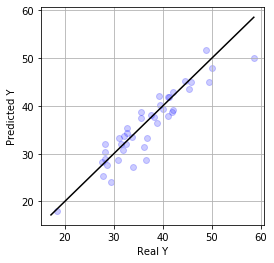

In [344]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, y_pred, alpha=0.2, c="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], c="black") # 線上に乗ってる程よい
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

## おまけ
以下の設問は問題数の都合上割愛したものになります。  
おまけみたいなので紹介してもらえればと思います。w

## 8. 線形補完
以下のような欠損値を含むデータ(`df_8`)を線形補完しなさい。  
線形補完：2点間を直線結んで等間隔で埋めること

In [109]:
df_8 = pd.DataFrame([5, np.nan, np.nan, np.nan, 8], columns=['interpol'])

In [110]:
df_8

,interpol
0,5.0
1,NaN
2,NaN
3,NaN
4,8.0


In [ ]:
df_8 = df_int.reset_index()

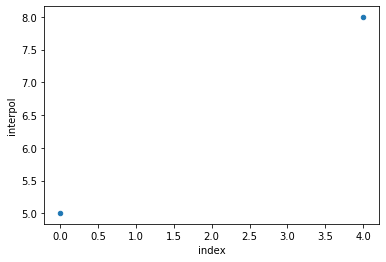

In [105]:
df_8.plot.scatter(x='index', y='interpol')

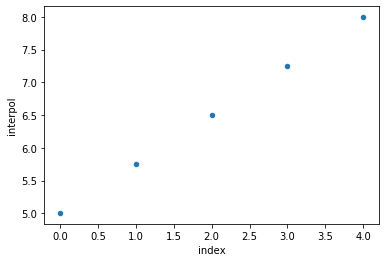

In [107]:
a.plot.scatter(x='index', y='interpol')

### 解答

In [99]:
df_int.interpolate(method='linear', limit_direction='forward', limit_area='inside')

,0
0,5.00
1,5.75
2,6.50
3,7.25
4,8.00


## 9. 中心化
以下のようにランダムに生成したデータ(x, y)から中心化したデータ(X, Y)を作成しなさい。

In [50]:
x, y = np.random.randint(50, 120, 20), np.random.randint(10, 30, 20)

### 解答

In [ ]:
X, Y = x-x.mean(), y-y.mean()

## 10. 中心化の可視化
先ほど中心化したデータ(X, Y)をプロットしなさい。

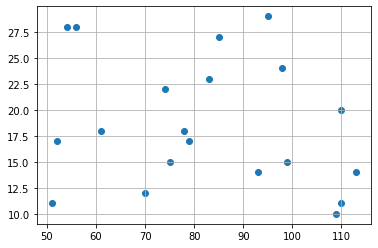

In [51]:
plt.scatter(x, y)
plt.grid(True)

### 解答

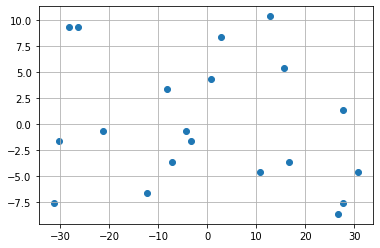

In [53]:
plt.scatter(X, Y)
plt.grid(True)